In [1]:
def dist(x1, x2):
    return (x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2

In [2]:
def f(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
def grad(x, y):
    dx = 2 * x - 2 + 100 * (-4 * y * x + 4 * x ** 3)
    dy = 100 * (2 * y - 2 * x ** 2)
    return (dx, dy)

In [11]:
x0 = (0, 0)
gamma = 0.001
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if i > 5000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
          f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

iter=1; x=(0.00, 0.00); f(x)=1.00; grad f(x)=(-2.00, -0.00)
iter=2; x=(0.00, 0.00); f(x)=0.99; grad f(x)=(-1.99, -0.00)
iter=3; x=(0.01, 0.00); f(x)=0.99; grad f(x)=(-1.99, -0.01)
iter=4; x=(0.01, 0.00); f(x)=0.98; grad f(x)=(-1.98, -0.01)
iter=5; x=(0.01, 0.00); f(x)=0.98; grad f(x)=(-1.98, -0.02)
iter=6; x=(0.01, 0.00); f(x)=0.98; grad f(x)=(-1.98, -0.02)
iter=7; x=(0.01, 0.00); f(x)=0.97; grad f(x)=(-1.97, -0.03)
iter=8; x=(0.02, 0.00); f(x)=0.97; grad f(x)=(-1.97, -0.03)
iter=9; x=(0.02, 0.00); f(x)=0.96; grad f(x)=(-1.96, -0.04)
iter=10; x=(0.02, 0.00); f(x)=0.96; grad f(x)=(-1.96, -0.05)
iter=11; x=(0.02, 0.00); f(x)=0.96; grad f(x)=(-1.95, -0.05)
iter=12; x=(0.02, 0.00); f(x)=0.95; grad f(x)=(-1.95, -0.06)
iter=13; x=(0.03, 0.00); f(x)=0.95; grad f(x)=(-1.95, -0.07)
iter=14; x=(0.03, 0.00); f(x)=0.95; grad f(x)=(-1.94, -0.08)
iter=15; x=(0.03, 0.00); f(x)=0.94; grad f(x)=(-1.94, -0.08)
iter=16; x=(0.03, 0.00); f(x)=0.94; grad f(x)=(-1.93, -0.09)
iter=17; x=(0.03, 0.00); f(x)=0.9

In [5]:
import matplotlib.pyplot as plt
import numpy as np

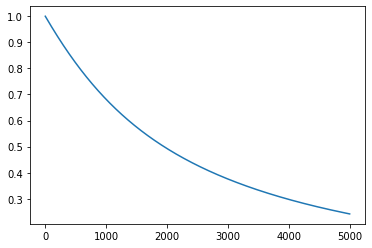

In [9]:
plt.plot(vals)

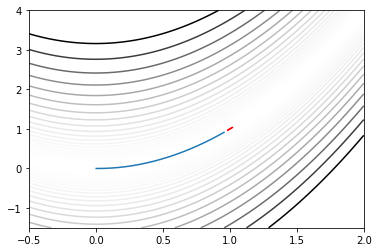

In [12]:
n = 100 # number of discretization points along the x-axis
m = 100 # number of discretization points along the x-axis
a=-0.5; b=2. # extreme points in the x-axis
c=-1.5; d=4. # extreme points in the y-axis
X,Y = np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X,Y,Z, np.logspace(-0.5, 3, 31),cmap='gray_r')
plt.plot([c[0] for c in coords], [c[1] for c in coords])
plt.scatter(1,1,c='red')



In [14]:
from scipy import optimize

In [15]:
def f_for_scipy(x):
    return f(x[0], x[1])

In [16]:
optimize.minimize(lambda x: f(*x), x0=(0, 0)) 

      fun: 2.8440316101421118e-11
 hess_inv: array([[0.49482454, 0.98957634],
       [0.98957634, 1.98394215]])
      jac: array([ 3.98673709e-06, -2.84416559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])

#### Task 1.
Найдите градиентным спуском минимум функции:
$2x^2-4xy+y^4+2$

In [26]:
def f(x, y):
    return 2*x**2 - 4*x*y + y**4 + 2

In [31]:
optimize.minimize(lambda x: f(*x), x0=(1.5,1.5))

      fun: 1.0000000000001774
 hess_inv: array([[0.36944386, 0.12482089],
       [0.12482089, 0.12471642]])
      jac: array([ 1.13248825e-06, -2.23517418e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([1.00000036, 1.00000009])

#### Task 2.
Обучите линейную регрессию из Задачи 3.7.3 при помощи градиентного спуска. Чему равно оптимальное значение $L^2-loss$
$L = (2.1 − w_0 − w_1)^2 + (2.9 − w_0 − 3w_1)^2 + (4.1 − w_0 − 5w_1)^2$

In [32]:
def f(w0, w1):
    return (2.1 - w0 - w1)**2 + (2.9 - w0 - 3*w1)**2 + (4.1 - w0 - 5*w1)**2

In [33]:
optimize.minimize(lambda x: f(*x), x0=(1.5,1.5))

      fun: 0.02666666666666806
 hess_inv: array([[ 0.73928041, -0.19027299],
       [-0.19027299,  0.0632603 ]])
      jac: array([-8.24220479e-08,  9.19681042e-08])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.53333332, 0.5       ])

#### Task 3.
Найдите градиентным спуском минимум функции $x^3-2x^2+y^2+z^2-2xy+xz-yz+3z$

In [34]:
def f(x, y, z):
    return x**3 - 2*x**2 + y**2 + z**2 - 2*x*y + x*z- y*z + 3*z

In [35]:
optimize.minimize(lambda x: f(*x), x0=(0,0,0))

      fun: -6.999999999999174
 hess_inv: array([[0.16947561, 0.16820099, 0.00211729],
       [0.16820099, 0.83498789, 0.33494512],
       [0.00211729, 0.33494512, 0.66854713]])
      jac: array([ 3.63588333e-06, -8.34465027e-07,  8.94069672e-07])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([ 2.00000044,  1.00000018, -1.99999971])